In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt

blas_matrix_size = []
blas_mflop =[]
blas_percentage = []


f = open("blas_performance_cori.txt", "r")
for line in f:
    spl = [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+", line)]
    blas_matrix_size.append(spl[0])
    blas_mflop.append(spl[1])
    blas_percentage.append(spl[2])
    
blas_matrix_size_, blas_mflop_ = zip(*sorted(zip(blas_matrix_size, blas_mflop)))
blas_matrix_size_, blas_percentage_ =  zip(*sorted(zip(blas_matrix_size, blas_percentage)))



matrix_size = []
mflop = []
percentage = []


count = 0
f = open("dgemm_peformance_cori.txt", "r")
for line in f:
    if count % 2 ==0:
        spl = [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+", line)]
        matrix_size.append(spl[0])
        mflop.append(spl[1])
        percentage.append(spl[2])
    count +=1 
matrix_size_, mflop_ = zip(*sorted(zip(matrix_size, mflop)))
matrix_size_, percentage_ =  zip(*sorted(zip(matrix_size, percentage)))


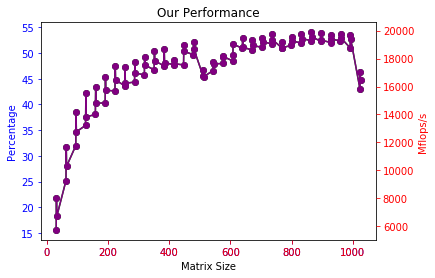

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(matrix_size_, percentage_, "-o", color="green")
ax.set_xlabel("Matrix Size", color="black")
ax.set_ylabel("Percentage", color="blue")
ax.tick_params(axis='x', colors="blue")
ax.tick_params(axis='y', colors="blue")

ax2.plot(matrix_size_, mflop_, "-o", color = "purple")
ax2.yaxis.tick_right()
ax2.set_ylabel('Mflops/s', color="red")        
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="red")
ax2.tick_params(axis='y', colors="red")

plt.title("Our Performance")

plt.show()